### Predict the product sale based on the media of Advertise.
Data Source : Kaggle.com

Data : Advertising.csv

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Advertising.csv", index_col=0)
#df --- dataframe , data in rows and column format
# single column -- series

In [3]:
df1=pd.read_csv("Advertising.csv")

In [4]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# To remove the unnamed column from the data or to remove any one column 
df1=df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [6]:
df1.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 4)

In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
len(df.columns)

4

#### Features are : 
               TV : Dollars spend to advertise on TV for Single Product (Dollers in Thousands)
               Radio : Amount spend to advertise on Radio
               Newspaper : Amount spend to advertise in NewsPaper
Target/ Response Variable:
            Sales : Total sale took place (Amount in Dollers in thousands)
            (Its a continuous value , so Regression Problem)

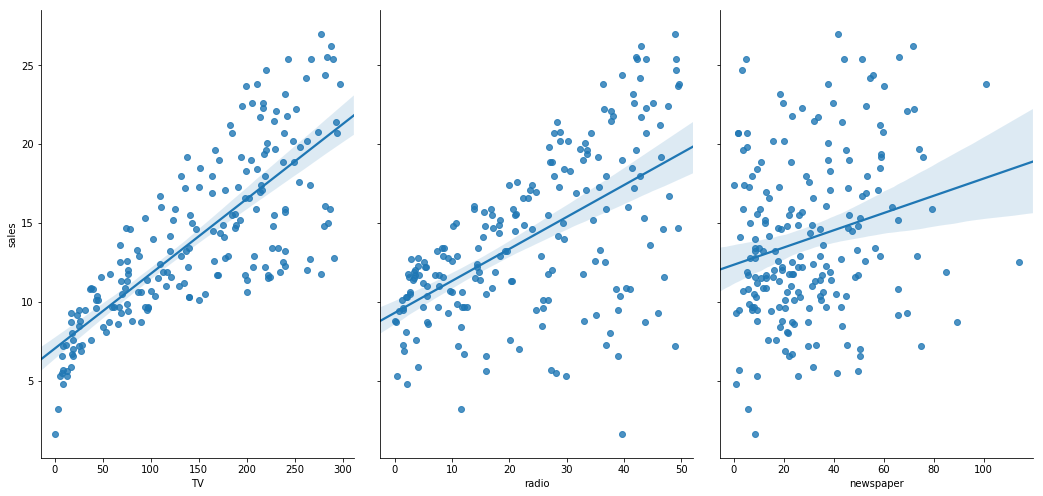

In [10]:
# draw a scatterplot to show relationship between dependent(Response/Target) and independent variable (Features)
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales' , size=7, aspect=0.7, kind='reg')

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


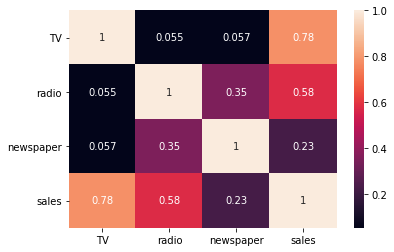

In [12]:
# correlation between variables
#lighter shade strong relation , dark shade - weak relation
corr=df.corr()
sns.heatmap(corr,annot=True)

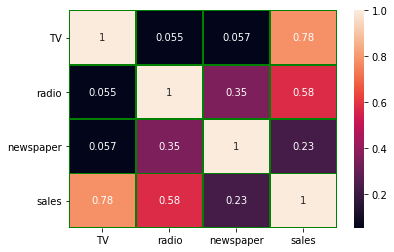

In [13]:
# correlation between variables
#lighter shade strong relation , dark shade - weak relation
corr=df.corr()
sns.heatmap(corr, lw=0.7, linecolor= "green",annot=True)

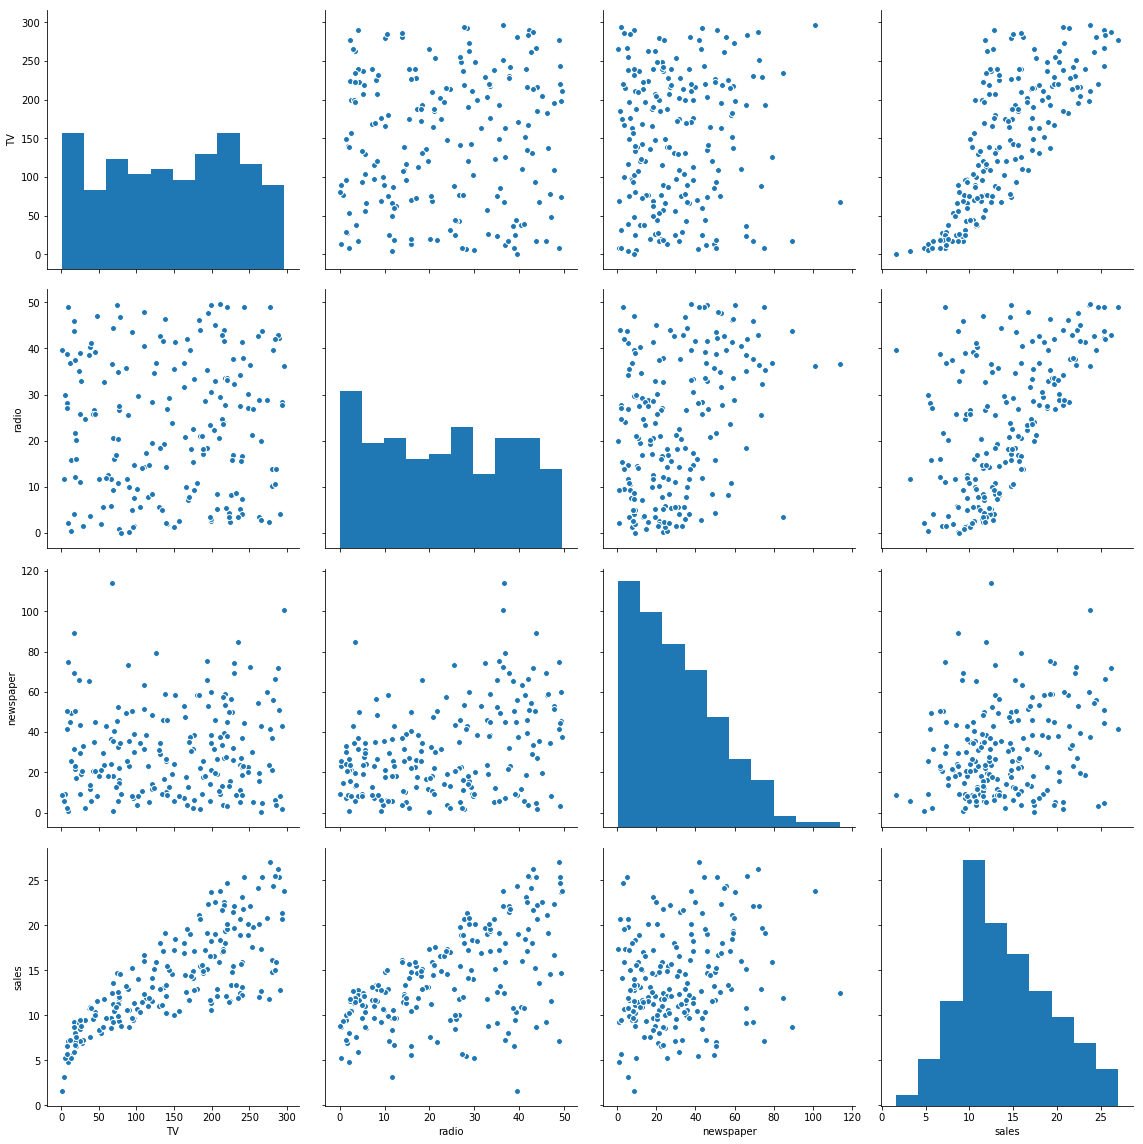

In [14]:
sns.pairplot(df, size=4)
plt.show()
# TV and sales having strong relationship

# Splitting data into x and y as training and testing data

In [15]:
y=df["sales"]   # target/ response/dependent variable data
x=df.drop(['sales'],axis=1) # feature data , independent variable data

In [16]:
# perform Data Split
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size= 0.3, random_state=4)

C:\Users\Shailendra\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# as cross_validation is deprecated so used here model_selection 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [18]:
print("x_train=", x_train.shape, "y_train = ", y_train.shape)
print("x_test=" , x_test.shape , "y_test= ", y_test.shape )


x_train= (140, 3) y_train =  (140,)
x_test= (60, 3) y_test=  (60,)


## Linear Regression using scikit-learn

In [19]:
# import Regression module
from sklearn.linear_model import LinearRegression

# Create object fro Regression
Lreg= LinearRegression()

# fit the model using training data  --  Learn the coefficients for linear regression
Lreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# print the intercept and coefficient
print("intercept = ", Lreg.intercept_)
print("coefficient = ", Lreg.coef_)

intercept =  3.0906443641251062
coefficient =  [0.04533392 0.17715767 0.00553852]


In [21]:
# pair the feature names with the coefficient
feature=x.columns
print(feature,Lreg.coef_)

Index(['TV', 'radio', 'newspaper'], dtype='object') [0.04533392 0.17715767 0.00553852]


Linear Regression (y) = 3.0906 + 0.0453 * TV + 0.1771 * radio + 0.0055 * newspaper

In [22]:
# check the Accuracy of the model
Lreg.score(x_test, y_test)

0.9127220729596172

In [23]:
# prediction on test data
ypred = Lreg.predict(x_test)
len(ypred)

60

In [24]:
from sklearn import metrics
import numpy as np
print("RMSE= ", np.sqrt(metrics.mean_squared_error(y_test, ypred)))
print("MSE = ", metrics.mean_squared_error(y_test,ypred))

RMSE=  1.4912326002041256
MSE =  2.2237746679115578


In [25]:
# to print the Actual value and predicted value
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})  
df1.head()

,Actual,Predicted
12,17.4,17.097774
100,17.2,16.861483
129,24.7,21.776155
176,27.0,24.538126
2,10.4,12.320087


In [26]:
# Excercise , check the error by removing newspaper data from training and testing data

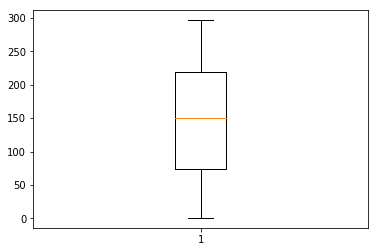

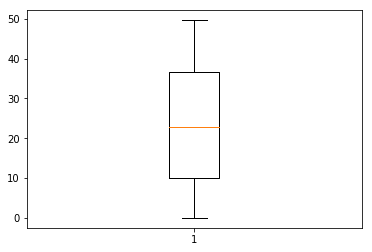

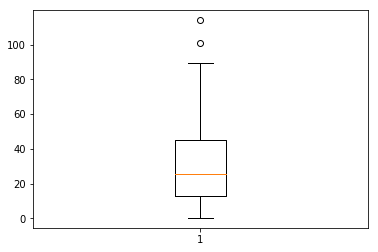

In [27]:
plt.boxplot(df.TV)
plt.show()
plt.boxplot(df.radio)
plt.show()
plt.boxplot(df.newspaper)
plt.show()

In [28]:
xvalue=['TV','Radio', 'Newspaper']
yvalue=[sum(df.TV), sum(df.radio), sum(df.newspaper)]

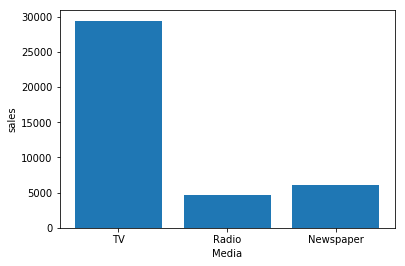

In [29]:
plt.bar(xvalue, yvalue) 
plt.xlabel("Media")
plt.ylabel("sales") 
plt.show()

In [30]:
print(yvalue)

[29408.499999999996, 4652.800000000005, 6110.799999999999]


### Conclusion : Model used : Regression.
                    Accuracy : 91%
                    Investment in TV Advertise  is giving more sale.
                    Error measures used : MSE, RMSE
                    Through pairplot we can see positive relationship between TV and Sales
                    can remove the Newspaper column and once check the accuracy with modified data.

#### ----------- END ---------------